In [3]:
import workload_simulation
import forgetting_curve as fc
import matplotlib
import importlib
import numpy

In [156]:
importlib.reload(workload_simulation)
import workload_simulation as ws

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
vals_to_print = []
total_output = []
# trick to get this kind of factor 1.0, 1.1, 1.2, 1.25, 1.3, 1.3333333333333333
# Why ? These factors produce sensible enough different simulations because intervals are integers 
# Intervals get rounded if they become float, so for the sake of the simulation, let's pick factors that
# would result in neat intervals

# How ? : take floats that would be close to integers when multiplied by common integers
list_of_factors = [i / 120 for i in range(3 * 60, 10 * 300) if (i % 30 == 0) or (i % 40 == 0) or (i % 12 == 0)]
focus_output = []
focus_output_too_high = []
focus_output_too_low = []
dif = 0.73
for factor in list_of_factors:
    pbt = fc.get_pb_success_from_interval_modifier(factor / 2.5, dif)
    l = ws.sim(pbt, nsims=4000, onfail="reset", ndays=1,
            difficulty=dif, factor=factor)
    quotient = l[0] / l[1]
    row = ws.SimulationResult(pbt, l[0], l[1], quotient, factor)
    total_output.append(row)

In [98]:
def analysis(total_output):
    factors = [output.factor for output in total_output]
    r_rates = [output.r_rate for output in total_output]
    w_loads = [output.w_load for output in total_output]
    effs = [output.efficiency for output in total_output]
    plt.scatter(factors, r_rates,  color='blue')
    t = np.polyfit(factors,r_rates,1)
    new_rates = [t[0]*f + t[1] for f in factors]
    plt.plot(factors,new_rates, color="red")
    plt.xlabel("Factors")
    plt.ylabel("Retention rate")
    plt.show()
    plt.scatter(factors, w_loads,  color='red')
    plt.xlabel("Factors")
    plt.ylabel("workload")
    plt.show()
    plt.scatter(factors, effs,  color='green')
    t = np.polyfit(factors,effs, 3)
    new_effs = [t[0]*f*f*f + t[1]*f*f + t[2]*f + t[3] for f in factors]
    plt.plot(factors,new_effs, color="blue")
    plt.xlabel("Factors")
    plt.ylabel("efficiency")
    plt.show()
    from operator import itemgetter
    print("outputs : recall proba, real retention rate, workload, retention/workload")
    best_productivity = max(total_output, key=itemgetter(3))
    print("best_productivity")
    print(best_productivity)
    print("factor used")
    print(best_productivity.factor)

    least_work = min(total_output, key=itemgetter(2))
    print("least work")
    print(least_work)
    print("factor used")
    print(least_work[4])
#analysis(total_output)

outputs : recall proba, real retention rate, workload, retention/workload
best_productivity
SimulationResult(pbt=0.6356015074863469, r_rate=0.8548000179683999, w_load=12.64325, efficiency=0.06760920000540999, factor=3.6)
factor used
3.6
least work
SimulationResult(pbt=0.5675199700606903, r_rate=0.8308710754635947, w_load=12.32225, efficiency=0.06742851958559473, factor=4.5)
factor used
4.5


In [43]:
t1 = numpy.polyfit(factors, r_rates, 1)
t2 = numpy.polyfit(factors, w_loads, 3)

In [101]:
import csv
results = []
with open("./simunight2.txt","r") as fmulti:
    fmulticsv = csv.reader(fmulti, delimiter=" ")
    for row in fmulticsv:
        res = ws.SimulationResult(*row[1:])._asdict()
        res["pbt"] = row[0]
        results.append(res)

In [102]:
results

[OrderedDict([('pbt', '70.0'),
              ('r_rate', '0.8179584310597515'),
              ('w_load', '18.9886'),
              ('efficiency', '0.04307628951369514'),
              ('factor', '3.8')]),
 OrderedDict([('pbt', '70.5'),
              ('r_rate', '0.8308914836076625'),
              ('w_load', '18.7141'),
              ('efficiency', '0.04439922216978976'),
              ('factor', '3.5')]),
 OrderedDict([('pbt', '71.0'),
              ('r_rate', '0.8282913885594954'),
              ('w_load', '18.1565'),
              ('efficiency', '0.045619551596370184'),
              ('factor', '3.6666666666666665')]),
 OrderedDict([('pbt', '71.5'),
              ('r_rate', '0.8367669930411895'),
              ('w_load', '17.6852'),
              ('efficiency', '0.0473145337932955'),
              ('factor', '3.5')]),
 OrderedDict([('pbt', '72.0'),
              ('r_rate', '0.834714555212902'),
              ('w_load', '17.1227'),
              ('efficiency', '0.04874900309021954'),
 

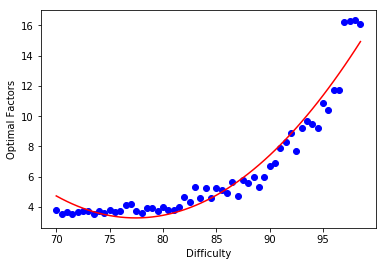

In [103]:
factors = [float(output["factor"]) for output in results]
pbt = [float(output["pbt"]) for output in results]
plt.scatter(pbt, factors, color="blue")
t = np.polyfit(np.asarray(pbt, dtype=float),np.asarray(factors, dtype=float),2)
new_factors = [t[0]*p*p + t[1]*p + t[2] for p in pbt]
plt.plot(pbt,new_factors, color="red")
plt.ylabel("Optimal Factors")
plt.xlabel("Difficulty")
plt.show()

In [96]:
import pickle
SimulationResult = ws.SimulationResult
v = ws.get_simdata("./simunight/71.5.pkl")

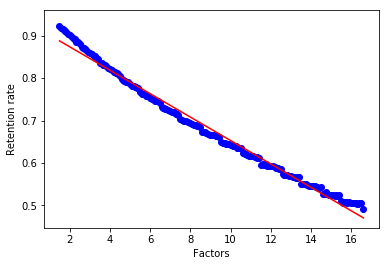

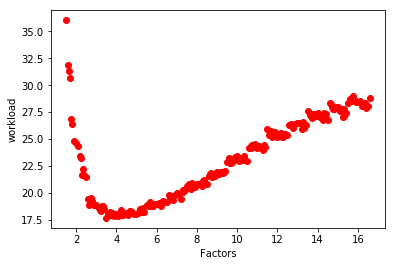

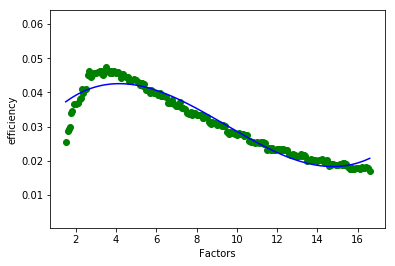

outputs : recall proba, real retention rate, workload, retention/workload
best_productivity
SimulationResult(pbt=0.6252136605388111, r_rate=0.8367669930411895, w_load=17.6852, efficiency=0.0473145337932955, factor=3.5)
factor used
3.5
least work
SimulationResult(pbt=0.6252136605388111, r_rate=0.8367669930411895, w_load=17.6852, efficiency=0.0473145337932955, factor=3.5)
factor used
3.5


In [99]:
analysis(v)

In [104]:
def get_SM2_Point(results):
    for r in results:
        if r.factor == 2.5:
            return r

In [114]:
s = get_SM2_Point(v)

In [136]:
def compare(source, target):
    return SimulationResult(source.pbt - target.pbt, source.r_rate - target.r_rate, 
                            source.w_load/target.w_load, source.efficiency/target.efficiency, source.factor/target.factor)

In [137]:
from operator import itemgetter
def get_best_prod(results):
    return max(results, key=itemgetter(3))

In [138]:
o = get_best_prod(v)

In [139]:
compare (o, s)

SimulationResult(pbt=-0.08978633946118886, r_rate=-0.0446441816470472, w_load=0.8241582589649789, efficiency=1.151901578468814, factor=1.4)

In [140]:
def compare_best_to_sm2(results):
    o = get_best_prod(results)
    s = get_SM2_Point(results)
    return compare (o, s)

In [162]:
compare_best_to_sm2(ws.get_simdata("./simunight/70.0.pkl"))

SimulationResult(pbt=-0.11850093491369773, r_rate=-0.05579360910097397, w_load=0.8223661986470452, efficiency=1.138355156167831, factor=1.52)

In [141]:
compare_best_to_sm2(ws.get_simdata("./simunight/90.0.pkl"))


SimulationResult(pbt=-0.1460024663215167, r_rate=-0.052517997094685964, w_load=0.660248946844768, efficiency=1.4325620698738504, factor=2.68)

In [142]:
compare_best_to_sm2(ws.get_simdata("./simunight/95.0.pkl"))

SimulationResult(pbt=-0.15039607169454372, r_rate=-0.046150636263926126, w_load=0.5614289480622199, efficiency=1.6982946741733813, factor=4.36)

# Stable Mode

## diff 90%

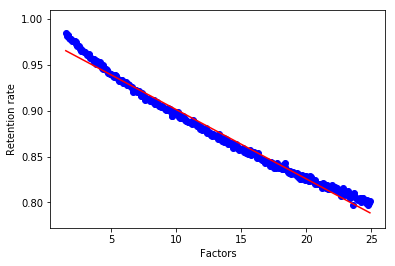

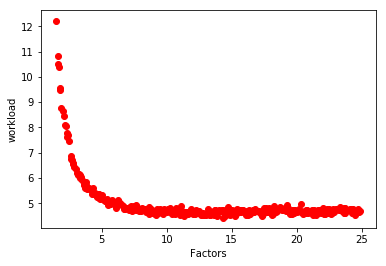

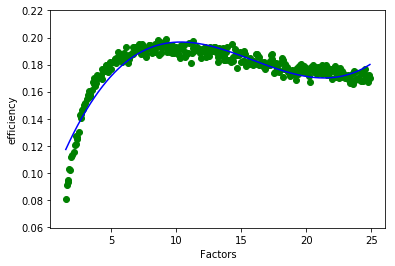

outputs : recall proba, real retention rate, workload, retention/workload
best_productivity
SimulationResult(pbt=0.6785977803106351, r_rate=0.9010836665933675, w_load=4.529, efficiency=0.1989586369161774, factor=9.2)
factor used
9.2
least work
SimulationResult(pbt=0.5473525604374787, r_rate=0.8651447578661464, w_load=4.435, efficiency=0.19507209872968354, factor=14.3)
factor used
14.3


SimulationResult(pbt=-0.2214022196893649, r_rate=-0.0692049107271775, w_load=0.6064542046063203, efficiency=1.5313208206502007, factor=3.6799999999999997)

In [159]:
list_of_factors = [i / 120 for i in range(3 * 60, 10 * 300) if (i % 30 == 0) or (i % 40 == 0) or (i % 12 == 0)]
focus_output = []
focus_output_too_high = []
focus_output_too_low = []
dif = 0.90
total_output = []
for factor in list_of_factors:
    pbt = fc.get_pb_success_from_interval_modifier(factor / 2.5, dif)
    l = ws.sim(pbt, nsims=1000, onfail="stable", ndays=1,
            difficulty=dif, factor=factor)
    quotient = l[0] / l[1]
    row = ws.SimulationResult(pbt, l[0], l[1], quotient, factor)
    total_output.append(row)
analysis(total_output)
compare_best_to_sm2(total_output)

## diff 70%

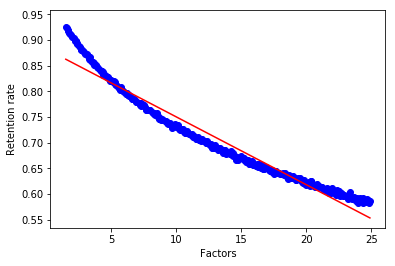

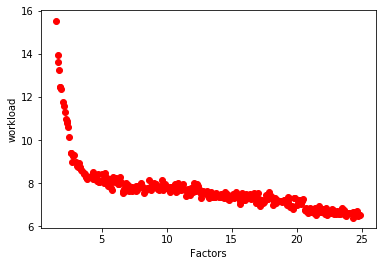

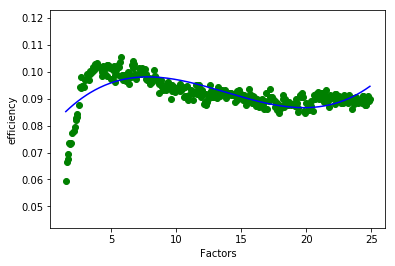

outputs : recall proba, real retention rate, workload, retention/workload
best_productivity
SimulationResult(pbt=0.44027648647741346, r_rate=0.8085375388153724, w_load=7.678, efficiency=0.10530574873865231, factor=5.75)
factor used
5.75
least work
SimulationResult(pbt=0.031066161059384277, r_rate=0.5827061921100959, w_load=6.404, efficiency=0.09099097315897813, factor=24.333333333333332)
factor used
24.333333333333332


SimulationResult(pbt=-0.2597235135225865, r_rate=-0.07992873727866201, w_load=0.7577970785629689, efficiency=1.2008985314678386, factor=2.3)

In [160]:
list_of_factors = [i / 120 for i in range(3 * 60, 10 * 300) if (i % 30 == 0) or (i % 40 == 0) or (i % 12 == 0)]
focus_output = []
focus_output_too_high = []
focus_output_too_low = []
dif = 0.70
total_output = []
for factor in list_of_factors:
    pbt = fc.get_pb_success_from_interval_modifier(factor / 2.5, dif)
    l = ws.sim(pbt, nsims=1000, onfail="stable", ndays=1,
            difficulty=dif, factor=factor)
    quotient = l[0] / l[1]
    row = ws.SimulationResult(pbt, l[0], l[1], quotient, factor)
    total_output.append(row)
analysis(total_output)
compare_best_to_sm2(total_output)

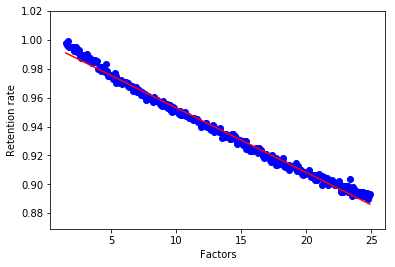

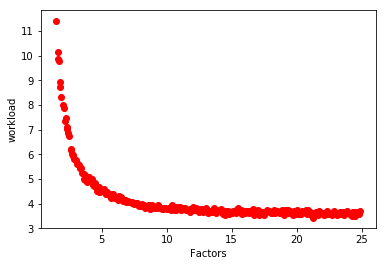

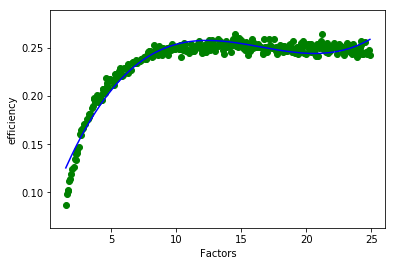

outputs : recall proba, real retention rate, workload, retention/workload
best_productivity
SimulationResult(pbt=0.7426717607501242, r_rate=0.9336575368623934, w_load=3.528, efficiency=0.2646421589746013, factor=14.5)
factor used
14.5
least work
SimulationResult(pbt=0.6466222507918956, r_rate=0.9060747602290639, w_load=3.433, efficiency=0.2639308943283029, factor=21.25)
factor used
21.25


SimulationResult(pbt=-0.20732823924987576, r_rate=-0.05931572103674332, w_load=0.5220479431784552, efficiency=1.8011076291563346, factor=5.8)

In [161]:
list_of_factors = [i / 120 for i in range(3 * 60, 10 * 300) if (i % 30 == 0) or (i % 40 == 0) or (i % 12 == 0)]
focus_output = []
focus_output_too_high = []
focus_output_too_low = []
dif = 0.95
total_output = []
for factor in list_of_factors:
    pbt = fc.get_pb_success_from_interval_modifier(factor / 2.5, dif)
    l = ws.sim(pbt, nsims=1000, onfail="stable", ndays=1,
            difficulty=dif, factor=factor)
    quotient = l[0] / l[1]
    row = ws.SimulationResult(pbt, l[0], l[1], quotient, factor)
    total_output.append(row)
analysis(total_output)
compare_best_to_sm2(total_output)